# Min-Distance Classifier

In [ ]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import random
from sklearn import datasets

import numpy as np

## Generate dataset

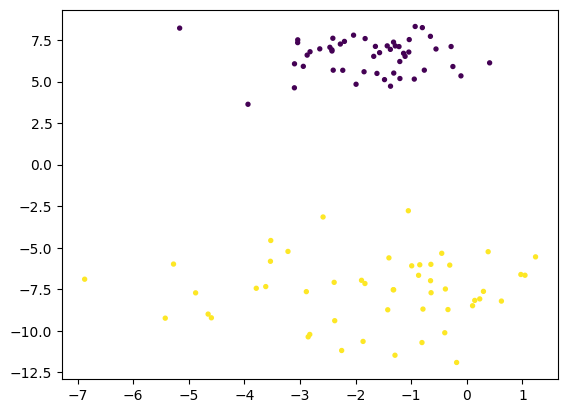

In [ ]:
X,y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=[1.0,2.0], center_box=(-10.0, 10.0), shuffle=True, random_state=None)
plt.scatter(X[:,0],X[:,1],c=y,s=8)


# Set Prototype

In [ ]:
X_type1 = np.array(X[y == 0])
X_type1 = np.mean(X_type1, axis=0)
X_type2 = np.array(X[y == 1])
X_type2 = np.mean(X_type2, axis=0)


In [ ]:
#gi(x) = xiT*x - (1/2)*xiT*xi,
#Sij=g(i)-g(j)=0
# X_type1_transpose = np.transpose(X_type1)
# X_type2_transpose = np.transpose(X_type2)
w1 =(-1/2)* np.dot(X_type1,X_type1) #+ X_type1*X
w2 =(-1/2)* np.dot(X_type2,X_type2) #+ X_type2*X



In [ ]:
# g1: X_type1[0]*x+X_type1[1]*y+w1=0
# g2: X_type2[0]*x+X_type2[1]*y+w2=0
# s1: g1-g2=0

In [ ]:
surface_x=np.linspace(-10, 10, 100)
surface_y=((w1-w2)-(X_type1[0]-X_type2[0])*surface_x)/(X_type1[1]-X_type2[1])

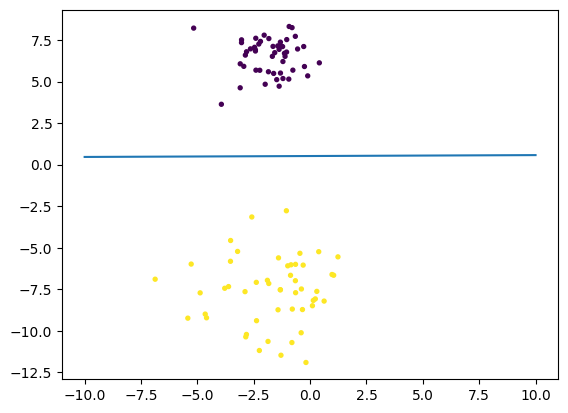

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=8)
# draw decision surface
plt.plot(surface_x, surface_y)
plt.show()

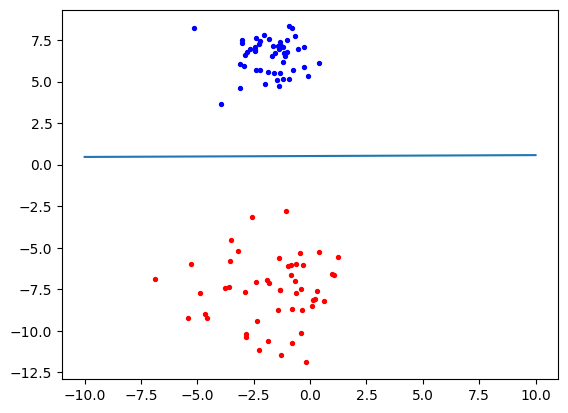

In [ ]:
bias=0
for a,b in X:
  descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)
  if descriminator>0:
    plt.scatter(a,b,c='blue',s=8)
  else:
    plt.scatter(a,b,c='red',s=8)

surface_y=((w1-w2)-(X_type1[0]-X_type2[0])*surface_x-bias)/(X_type1[1]-X_type2[1])
plt.plot(surface_x, surface_y)
plt.show()

## Training process

In [ ]:
bias=0
learning_rate=0.5
for epoce in range(5):
  for i,zz in enumerate(X):
    a,b=zz
    descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)+bias
    if descriminator>0:
      if y[i]!=0:
        bias=bias+(y[i]-descriminator)*learning_rate
    else:
      if y[i]!=1:
        bias=bias+(y[i]-descriminator)*learning_rate


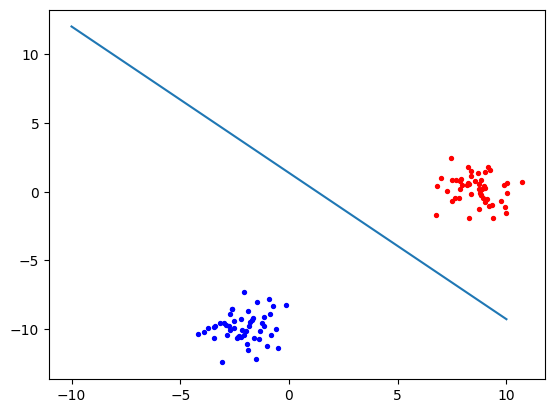

In [ ]:
for a,b in X:
  descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)+bias
  if descriminator>0:
    plt.scatter(a,b,c='blue',s=8)
  else:
    plt.scatter(a,b,c='red',s=8)

surface_y=((w1-w2)-(X_type1[0]-X_type2[0])*surface_x-bias)/(X_type1[1]-X_type2[1])
plt.plot(surface_x, surface_y)
plt.show()

# Perceptron

In [ ]:
import numpy as np
class Perceptron:
	# Single layer
	def __init__(self, N, learning_rate=0.1):
		self.W = np.random.randn(N + 1) / np.sqrt(N)
		self.learning_rate = learning_rate
	def step(self, x):
		return 1 if x > 0 else 0
	def fit(self, X, y, epochs=10):
		# inser the one to calculate bias
		X = np.c_[X, np.ones((X.shape[0]))]
		for epoch in range(epochs):
			for (x, target) in zip(X, y):
				p = self.step(np.dot(x, self.W))
				if p != target:
					error = p - target
					self.W += -self.learning_rate * error * x
	def activate(self, X):
		cal=np.dot(x, self.W)
	def predict(self, X, addBias=True):
		X = np.atleast_2d(X)
		if addBias:
			X = np.c_[X, np.ones((X.shape[0]))]
		return self.step(np.dot(X, self.W))

In [ ]:
p = Perceptron(X.shape[1], learning_rate=0.1)
p.fit(X, y, epochs=20)

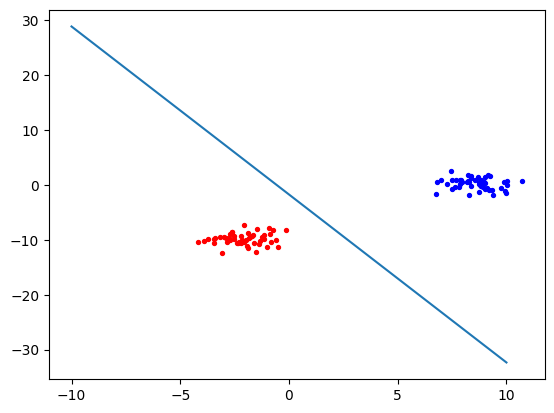

In [ ]:
for (x, target) in zip(X, y):
  pred = p.predict(x)
  if pred>0:
    plt.scatter(x[0],x[1],c='blue',s=8)
  else:
    plt.scatter(x[0],x[1],c='red',s=8)
w=p.W
surface_y=((w[2])-(w[0])*surface_x)/(w[1])
plt.plot(surface_x, surface_y)
plt.show()

## XOR problem

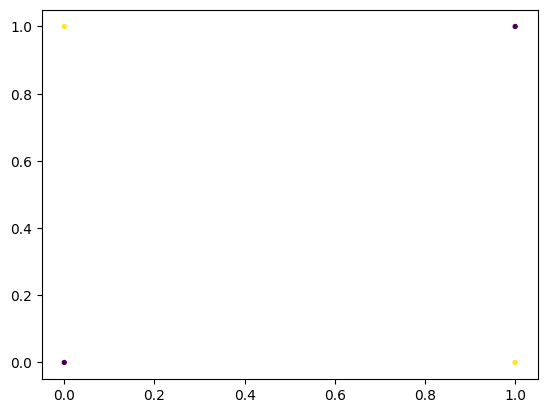

In [ ]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
plt.scatter(X[:,0],X[:,1],c=y,s=8)


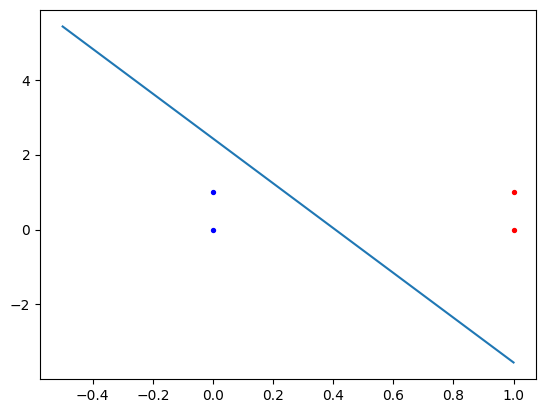

In [ ]:
p = Perceptron(X.shape[1], learning_rate=0.1)
p.fit(X, y, epochs=20)

for (x, target) in zip(X, y):
  pred = p.predict(x)
  if pred>0:
    plt.scatter(x[0],x[1],c='blue',s=8)
  else:
    plt.scatter(x[0],x[1],c='red',s=8)
w=p.W
surface_x=np.linspace(-0.5, 1, 10)
surface_y=(-(w[2])-(w[0])*surface_x)/(w[1])
plt.plot(surface_x, surface_y)
plt.show()